## Dargon Real Estate- Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286545,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705469,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
#for plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20, 15))

## Train-Test splitting

In [8]:
# for learing purpose
"""
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
"""

'\nimport numpy as np\ndef split_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n    print(shuffled)\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\n'

In [9]:
# train_set ,test_set = split_train_test(housing,0.2)

In [10]:
# print(f"Rows in train set: {len(train_set)}\n Rows in test set:{len(test_set)}\n")

In [11]:
from sklearn.model_selection  import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set: 404
 Rows in test set:102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [13]:
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [14]:
housing = strat_train_set.copy()

## Looking for Correlations

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

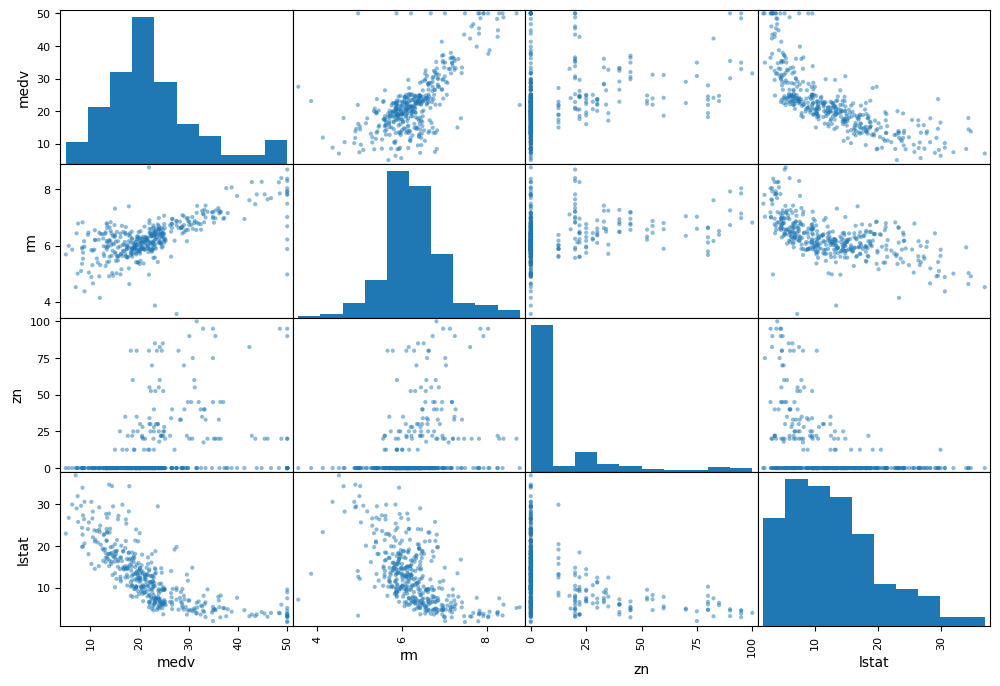

In [15]:
from pandas.plotting import scatter_matrix
attributes =['medv','rm','zn','lstat']
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='rm', ylabel='medv'>

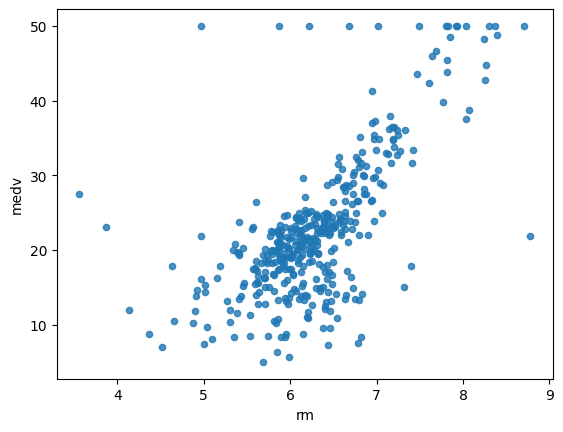

In [16]:
housing.plot(kind="scatter", x="rm", y="medv" ,alpha=0.8)

## Trying out attribute combinations

In [17]:
housing["taxrm"] = housing["tax"]/housing['rm']

In [18]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [19]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.679155
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
taxrm     -0.527767
lstat     -0.740494
Name: medv, dtype: float64

<Axes: xlabel='taxrm', ylabel='medv'>

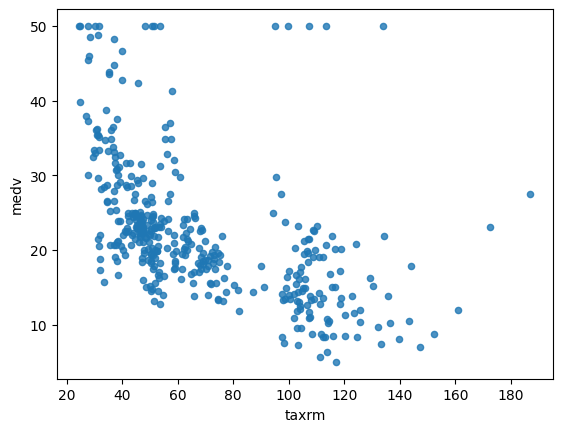

In [20]:
housing.plot(kind="scatter", x="taxrm", y="medv" ,alpha=0.8)

In [21]:
housing =  strat_train_set.drop('medv', axis=1)
housing_labels = strat_train_set['medv'].copy()

## Missing attribute

In [22]:
#To take care of missing attributes, you have three options
# 1. Get rid of the missing data points
# 2. Get rid of the whole attribute
# 3. Set the value to some value(0, mean or median)

In [23]:
a=housing.dropna(subset=["rm"]).shape #option 1
# Note that the orginial housing dataframe will remain unchanged

In [24]:
housing.drop('rm', axis=1).shape #option 2
# note that there is no rm column and also note that the orginial housing dataframe will remain unchanged

(404, 12)

In [25]:
median = housing['rm'].median() #compute median for option 3

In [26]:
housing['rm'].fillna(median) #option 3
#Note that the original housing dataframe will reamin unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [27]:
housing.shape

(404, 13)

In [28]:
housing.describe() #before we started filling missing attributes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,402.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282035,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714038,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630750,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [33]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281696,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712280,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three type of objects
1. Estimators- It estimates some parameter based on a dataset. 
Eg: imputer 
It has a fit method and transform method
Fit method- Fits the dataset and calculates internal parameters

2. Transformers- Takes input and returns output based on the learings from fit().
It also has a convenience fucntion called fit_transform() which fits and the transforms.
     
3. Predictors- LinearRegression module is an example of predictor. fit() and
predict are two common functions. It also gives score function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value-min)/(max-min)
   Sklearn provides a class called MinMaxScaler for this
   
2. Standardiztion
   (value-mean)/std
   Sklearn provides a class called StandardScaler for this
 

## Creating a Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    #....add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])
    


In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr.shape  #<--  is numpy array

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= LinearRegression()
#model= DecisionTreeRegressor()
model= RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [38]:
some_data =housing.iloc[:5]

In [39]:
some_labels= housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.264, 25.284, 16.501, 23.244, 23.579])

In [42]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [44]:
rmse

1.2323860801287267

## Using better evaluation technique-cross Validation

In [45]:
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring= "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [47]:
print_scores(rmse_scores)

Scores: [2.82542677 2.79365441 4.32147401 2.52450947 3.45209173 2.58921457
 4.75424666 3.38248881 3.10987141 3.09682234]
Mean: 3.284980017074178
Standard deviation: 0.6965314025953028


### Saving the model

In [48]:
from joblib import dump,load
dump(model,'Dargon.joblib')


['Dargon.joblib']

### Testing the model on test data

In [51]:
x_test = strat_test_set.drop('medv', axis=1)
y_test = strat_test_set['medv'].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse= np.sqrt(final_mse)
print(final_predictions,list(y_test))

[24.228 11.396 25.767 21.691 18.35  15.259 20.198 14.344 32.297 41.783
 19.934 11.957 24.331 26.667 19.616 11.345 32.197 14.394 23.528 18.407
 20.066 17.627 16.544 22.089 18.869 32.045 16.169 33.278  9.193 33.975
 24.674 21.175 22.936 10.907 21.149 10.82  44.168 24.557 23.17  42.363
 23.86  30.39  20.121 20.689 20.089 33.986 44.045 20.197 20.667 21.871
 20.842 14.497 21.766 14.622 25.182 33.386 42.105 29.036 19.574 20.756
 46.647  9.561 19.017 25.215 14.77  33.521 20.273 18.454 19.647 34.287
 26.994 22.882 21.235 22.555 34.464 12.717 16.128 19.981 20.563 21.255
 22.552 20.759 14.313 22.815 21.075 21.354 14.378 21.466 22.07  23.248
 18.73  27.064  7.016 26.702 19.4   29.612 19.68  31.147 14.969 26.961
 21.638 19.856] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [53]:
final_rmse

2.8940073732578133

In [54]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24416078, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

###  Using the model

In [56]:
from joblib import dump,load
import numpy as np
model = load('Dargon.joblib')
Features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24416078, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(Features)

array([22.264])